In [152]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



In [153]:
project_name = "jailbreaks_small_v1"
eval_run_id = "basline_6x5"

results_path = Path("../results") / project_name / "aggregated_results" / eval_run_id / f"evaluation_{eval_run_id}.csv"

df = pd.read_csv(results_path)

In [154]:
df

,method,model,benchmark,evaluator,values_gen_time,avg_gen_time,std_gen_time,values_refusal,avg_refusal,std_refusal,values_score,avg_score,std_score
0,prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.04955465 0.04955465 0.04955465 0.04955465 0...,0.098778,0.024265,[0.67067308 0.68509615 0.68990385 0.69711538 0...,0.687981,0.009782,[0.67067308 0.68509615 0.68990385 0.69711538 0...,0.687981,0.009782
1,baseline,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.10743374 0.10743374 0.10743374 0.10743374 0...,0.098043,0.020059,[0.75240385 0.76442308 0.76201923 0.76923077 0...,0.759615,0.007291,[0.75240385 0.76442308 0.76201923 0.76923077 0...,0.759615,0.007291
2,diffinmeans,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.21175741 0.21175741 0.21175741 0.21175741 0...,0.211327,0.003527,[0.08413462 0.09134615 0.09855769 0.07211538 0...,0.089423,0.010467,[0.08413462 0.09134615 0.09855769 0.07211538 0...,0.089423,0.010467
3,outputaware,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.48252019 0.48252019 0.48252019 0.48252019 0...,1.049493,0.249844,[0.85817308 0.86057692 0.86057692 0.86057692 0...,0.859615,0.001178,[0.85817308 0.86057692 0.86057692 0.86057692 0...,0.859615,0.001178
4,diffinmeans_prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.21468963 0.21468963 0.21468963 0.21468963 0...,0.216086,0.002456,[0.05528846 0.04086538 0.05288462 0.05048077 0...,0.052885,0.007752,[0.05528846 0.04086538 0.05288462 0.05048077 0...,0.052885,0.007752
5,prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.11508834 0.11508834 0.11508834 0.11508834 0...,0.102306,0.003775,[0.10576923 0.10817308 0.11057692 0.10336538 0...,0.106250,0.002803,[0.10576923 0.10817308 0.11057692 0.10336538 0...,0.106250,0.002803
6,baseline,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.09936975 0.09936975 0.09936975 0.09936975 0...,0.099017,0.000431,[0.96153846 0.96634615 0.95432692 0.96153846 0...,0.961538,0.004022,[0.96153846 0.96634615 0.95432692 0.96153846 0...,0.961538,0.004022
7,diffinmeans,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.18835018 0.18835018 0.18835018 0.18835018 0...,0.187007,0.003283,[0.0625 0.08173077 0.07692308 0.08173077 0...,0.075481,0.007066,[0.0625 0.08173077 0.07692308 0.08173077 0...,0.075481,0.007066
8,outputaware,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[1.11467604 1.11467604 1.11467604 1.11467604 1...,1.105988,0.024500,[0.92788462 0.93509615 0.93990385 0.9375 0...,0.933654,0.004950,[0.92788462 0.93509615 0.93990385 0.9375 0...,0.933654,0.004950
9,diffinmeans_prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.19025724 0.19025724 0.19025724 0.19025724 0...,0.190862,0.003204,[0.02644231 0.01923077 0.02163462 0.03605769 0...,0.024038,0.006799,[0.02644231 0.01923077 0.02163462 0.03605769 0...,0.024038,0.006799


In [155]:
df[["values_refusal"]]

,values_refusal
0,[0.67067308 0.68509615 0.68990385 0.69711538 0...
1,[0.75240385 0.76442308 0.76201923 0.76923077 0...
2,[0.08413462 0.09134615 0.09855769 0.07211538 0...
3,[0.85817308 0.86057692 0.86057692 0.86057692 0...
4,[0.05528846 0.04086538 0.05288462 0.05048077 0...
5,[0.10576923 0.10817308 0.11057692 0.10336538 0...
6,[0.96153846 0.96634615 0.95432692 0.96153846 0...
7,[0.0625 0.08173077 0.07692308 0.08173077 0...
8,[0.92788462 0.93509615 0.93990385 0.9375 0...
9,[0.02644231 0.01923077 0.02163462 0.03605769 0...


In [156]:

import re
import ast

metric_names = ["refusal", "gen_time"]

def fully_robust_parser(s):
    if isinstance(s, list):
        return s  # Already parsed
    # Remove newlines and normalize spaces
    s = re.sub(r'\s+', ' ', s.strip())
    # Remove brackets temporarily
    s_clean = s.strip('[]')
    # Add a comma between numbers that are not separated by a comma (handles floats like '1. 0.8')
    s_clean = re.sub(r'(?<=[\d.]) (?=[\d.-])', ', ', s_clean)
    # Wrap again in brackets
    s_clean = f'[{s_clean}]'
    return ast.literal_eval(s_clean)

for metric_name in metric_names:
    df[f"values_{metric_name}"] = df[f"values_{metric_name}"].apply(fully_robust_parser)
    

In [157]:
from scipy.stats import norm

def compute_ci(df, metric_name, alpha=0.05):
    z = norm.ppf(1 - alpha / 2)
    n = df["values_refusal"].apply(len)

    confidence_level = 1-alpha

    margin = z * df[f"std_{metric_name}"] / np.sqrt(n)

    avg = df[f"avg_{metric_name}"]
    std = df[f"std_{metric_name}"]

    df[f"ci_upper_{metric_name}"] = df[f"avg_{metric_name}"] + margin

    results_df = df[["method", "model", "benchmark", "evaluator"]]
    results_df["metric"] = metric_name
    results_df["avg"] = avg
    results_df["std"] = std
    # results_df["ci_lower"] = avg - margin
    # results_df["ci_upper"] = avg + margin
    results_df["ci_error"] = margin
    results_df["n"] = n
    results_df["confidence_level"] = confidence_level
    
    return results_df

In [158]:
result_dfs = []
for metric_name in metric_names:
    result_dfs.append(compute_ci(df, metric_name, alpha=0.001))


/var/folders/qk/chlqbgnn41b0wjghf601kjxm0000gn/T/ipykernel_85674/3694450769.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["metric"] = metric_name
/var/folders/qk/chlqbgnn41b0wjghf601kjxm0000gn/T/ipykernel_85674/3694450769.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["avg"] = avg
/var/folders/qk/chlqbgnn41b0wjghf601kjxm0000gn/T/ipykernel_85674/3694450769.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [159]:
def plot_scores(
    df,
    metric_name: str,
    model_order: list = None,
    method_order: list = None,
    y_col: str = "avg",
    ci_col: str = "ci_error",
    title: str = None
):
    
    # Sort df so bar positions match visual plot order
    df = df.copy()
    df["method"] = pd.Categorical(df["method"], categories=method_order, ordered=True)
    df["model"] = pd.Categorical(df["model"], categories=model_order, ordered=True)
    df = df.sort_values(["method", "model"])

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    ax = sns.barplot(
        data=df,
        x="method",
        y=y_col,
        hue="model",
        hue_order=model_order,
        order=method_order,
        dodge=True,
        errorbar=None,
        capsize=0.1
    )

    # Add error bars manually
    for bars, model in zip(ax.containers, model_order or df["model"].unique()):
        model_rows = df[df["model"] == model]
        for bar, (_, row) in zip(bars, model_rows.iterrows()):
            x = bar.get_x() + bar.get_width() / 2
            ax.errorbar(
                x=x,
                y=row[y_col],
                yerr=row[ci_col],
                fmt='none',
                ecolor='black',
                capsize=3,
                linewidth=1
            )

    ax.set_ylabel(metric_name)
    ax.set_xlabel("Method")
    ax.set_title(f"{title} with {df.confidence_level.iloc[0] * 100}% Confidence Intervals")
    plt.xticks(rotation=0)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


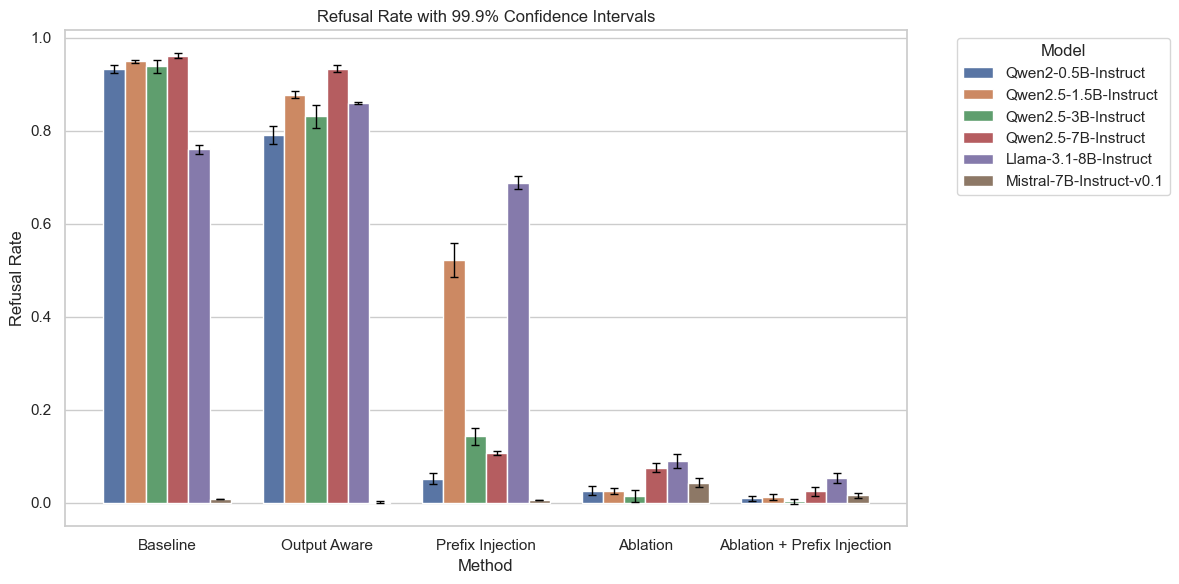

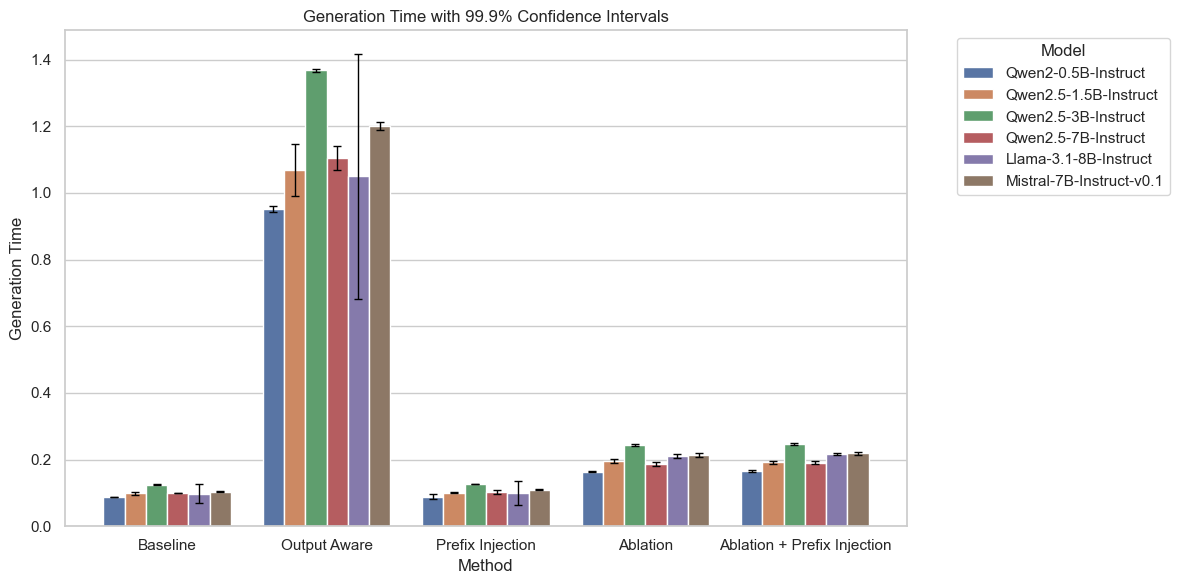

In [160]:
METHOD_1 = "Baseline"
METHOD_2 = "Prefix Injection"
METHOD_3 = "Ablation"
METHOD_4 = "Ablation + Prefix Injection"
METHOD_5 = "Output Aware"

method_map = {
    "baseline": METHOD_1,
    "prefixinjection-3": METHOD_2,
    "diffinmeans": METHOD_3,
    "diffinmeans_prefixinjection-3": METHOD_4,
    "outputaware": METHOD_5,
    
}

plot_dfs = []
for result_df in result_dfs:
    plot_df = result_df.copy()

    plot_df["method"] = result_df["method"].replace(method_map)
    plot_dfs.append(plot_df)

model_order = [
    "Qwen2-0.5B-Instruct",
    "Qwen2.5-1.5B-Instruct",
    "Qwen2.5-3B-Instruct",
    "Qwen2.5-7B-Instruct",
    "Llama-3.1-8B-Instruct",
    "Mistral-7B-Instruct-v0.1"
]

method_order = [
    METHOD_1,
    METHOD_5,   
    METHOD_2,
    METHOD_3,
    METHOD_4,
]

titles = [
    "Refusal Rate",
    "Generation Time"
]

for i, plot_df in enumerate(plot_dfs):
    plot_scores(plot_df, metric_name=f"{titles[i]}", model_order=model_order, method_order=method_order, title=titles[i])

In [161]:
def plot_delta_from_baseline(df, model_order, method_order, baseline_method: str):
    baseline_df = df[df["method"] == baseline_method][["model", "avg"]]
    baseline_df = baseline_df.rename(columns={"avg": "baseline_avg"})

    delta_df = df.merge(baseline_df, on="model", how="left")

    # Compute change from baseline
    delta_df["delta"] = delta_df["avg"] - delta_df["baseline_avg"]
    delta_df = delta_df[delta_df["method"] != baseline_method]

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Plot deltas (already computed)
    ax = sns.barplot(
        data=delta_df,
        x="method",
        y="delta",
        hue="model",
        hue_order=model_order,
        order=method_order,
        dodge=True,
        errorbar=None,
        capsize=0.1
    )

    ax.axhline(0, color="black", linestyle="--")
    ax.set_ylabel("Change in Refusal Score (Δ from Baseline)")
    ax.set_xlabel("Method")
    ax.set_title("Refusal Rate Change from Baseline")
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [162]:
result_dfs[0]

,method,model,benchmark,evaluator,metric,avg,std,ci_error,n,confidence_level
0,prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,refusal,0.687981,0.009782,0.014395,5,0.999
1,baseline,Llama-3.1-8B-Instruct,advbench-416,include-refusal,refusal,0.759615,0.007291,0.010730,5,0.999
2,diffinmeans,Llama-3.1-8B-Instruct,advbench-416,include-refusal,refusal,0.089423,0.010467,0.015403,5,0.999
3,outputaware,Llama-3.1-8B-Instruct,advbench-416,include-refusal,refusal,0.859615,0.001178,0.001733,5,0.999
4,diffinmeans_prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,refusal,0.052885,0.007752,0.011408,5,0.999
5,prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,refusal,0.106250,0.002803,0.004125,5,0.999
6,baseline,Qwen2.5-7B-Instruct,advbench-416,include-refusal,refusal,0.961538,0.004022,0.005919,5,0.999
7,diffinmeans,Qwen2.5-7B-Instruct,advbench-416,include-refusal,refusal,0.075481,0.007066,0.010398,5,0.999
8,outputaware,Qwen2.5-7B-Instruct,advbench-416,include-refusal,refusal,0.933654,0.004950,0.007284,5,0.999
9,diffinmeans_prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,refusal,0.024038,0.006799,0.010005,5,0.999


In [163]:
result_dfs[1]

,method,model,benchmark,evaluator,metric,avg,std,ci_error,n,confidence_level
0,prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,gen_time,0.098778,0.024265,0.035708,5,0.999
1,baseline,Llama-3.1-8B-Instruct,advbench-416,include-refusal,gen_time,0.098043,0.020059,0.029518,5,0.999
2,diffinmeans,Llama-3.1-8B-Instruct,advbench-416,include-refusal,gen_time,0.211327,0.003527,0.005190,5,0.999
3,outputaware,Llama-3.1-8B-Instruct,advbench-416,include-refusal,gen_time,1.049493,0.249844,0.367662,5,0.999
4,diffinmeans_prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,gen_time,0.216086,0.002456,0.003614,5,0.999
5,prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,gen_time,0.102306,0.003775,0.005556,5,0.999
6,baseline,Qwen2.5-7B-Instruct,advbench-416,include-refusal,gen_time,0.099017,0.000431,0.000635,5,0.999
7,diffinmeans,Qwen2.5-7B-Instruct,advbench-416,include-refusal,gen_time,0.187007,0.003283,0.004831,5,0.999
8,outputaware,Qwen2.5-7B-Instruct,advbench-416,include-refusal,gen_time,1.105988,0.024500,0.036054,5,0.999
9,diffinmeans_prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,gen_time,0.190862,0.003204,0.004715,5,0.999


I want to convert them to:
    Method, Model, avg_metric1, ci_error_metric1, avg_metric2, ci_error_metric2


In [164]:
reshaped_dfs = []

for df in result_dfs:
    reshaped = df.pivot_table(
        index=['method', 'model'],
        columns='metric',
        values=['avg', 'ci_error']
    )

    reshaped.columns = [f'{stat}_{metric}' for stat, metric in reshaped.columns]
    reshaped = reshaped.reset_index()

    reshaped_dfs.append(reshaped)

In [165]:
from functools import reduce
merged_df = reduce(lambda left, right: pd.merge(left, right, on=['method', 'model'], how='outer'), reshaped_dfs)

In [166]:
def remove_models(df, models):
    return df[~df["model"].isin(models)]
rm_mistral_df = remove_models(merged_df, ["Mistral-7B-Instruct-v0.1"])


In [167]:
import pandas as pd

def total_method_summary(df):
    # Assuming df is your merged long dataframe
    avg_cols = [col for col in df.columns if col.startswith('avg_')]
    ci_cols = [col for col in df.columns if col.startswith('ci_error_')]

    summary_rows = []

    for method, group in df.groupby('method'):
        row = {'method': method}
        
        for avg_col in avg_cols:
            ci_col = avg_col.replace('avg_', 'ci_error_')

            # Compute average of averages
            avg_mean = group[avg_col].mean()

            # Compute conservative ci_error estimate
            lower = (group[avg_col] - group[ci_col]).min()
            upper = (group[avg_col] + group[ci_col]).max()
            ci_range = (upper - lower) / 2

            row[avg_col] = avg_mean
            row[ci_col] = ci_range

        summary_rows.append(row)

    summary_df = pd.DataFrame(summary_rows)

    #df_with_summary = pd.concat([df, summary_df], ignore_index=True)
    
    return summary_df



In [168]:
avg_df = total_method_summary(rm_mistral_df)

In [169]:
avg_df

,method,avg_refusal,ci_error_refusal,avg_gen_time,ci_error_gen_time
0,baseline,0.908462,0.109286,0.101858,0.029518
1,diffinmeans,0.045962,0.051430,0.200398,0.042623
2,diffinmeans_prefixinjection-3,0.020385,0.033303,0.202592,0.043665
3,outputaware,0.858462,0.084328,1.108720,0.367662
4,prefixinjection-3,0.301827,0.331563,0.103450,0.035708


In [170]:
def plot_two_metrics_side_by_side(
    df,
    metric1: str = "refusal",
    metric2: str = "gen_time",
    title: str = "Comparison of Two Metrics per Method",
    y_label: str = "Score",
    method_display: dict = None,
    metric_display: dict = None,
    method_order: list = None,
):
    df = df.copy()

    # Optional display mapping for method names
    if method_display:
        df["method"] = df["method"].map(method_display).fillna(df["method"])

    # Melt the DataFrame to long format
    melted = pd.DataFrame({
        "method": pd.concat([df["method"], df["method"]]),
        "metric": [metric1] * len(df) + [metric2] * len(df),
        "avg": pd.concat([df[f"avg_{metric1}"], df[f"avg_{metric2}"]]),
        "ci_error": pd.concat([df[f"ci_error_{metric1}"], df[f"ci_error_{metric2}"]]),
    })

    # Optional display mapping for metrics
    if metric_display:
        melted["metric"] = melted["metric"].map(metric_display).fillna(melted["metric"])
        hue_order = [metric_display.get(metric1, metric1), metric_display.get(metric2, metric2)]
    else:
        hue_order = [metric1, metric2]

    # Apply method order
    if method_order:
        melted["method"] = pd.Categorical(melted["method"], categories=method_order, ordered=True)

    melted["metric"] = pd.Categorical(melted["metric"], categories=hue_order, ordered=True)

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    ax = sns.barplot(
        data=melted,
        x="method",
        y="avg",
        hue="metric",
        hue_order=hue_order,
        dodge=True,
        errorbar=None,
        capsize=0.1
    )

    for bars, metric in zip(ax.containers, hue_order):
        # Filter and sort by method order
        metric_rows = melted[melted["metric"] == metric]
        if method_order:
            metric_rows = metric_rows.set_index("method").loc[method_order].reset_index()

        for bar, (_, row) in zip(bars, metric_rows.iterrows()):
            x = bar.get_x() + bar.get_width() / 2
            ax.errorbar(
                x=x,
                y=row["avg"],
                yerr=row["ci_error"],
                fmt='none',
                ecolor='black',
                capsize=3,
                linewidth=1
            )

    ax.set_ylabel(y_label)
    ax.set_xlabel("Method")
    ax.set_title(title)
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


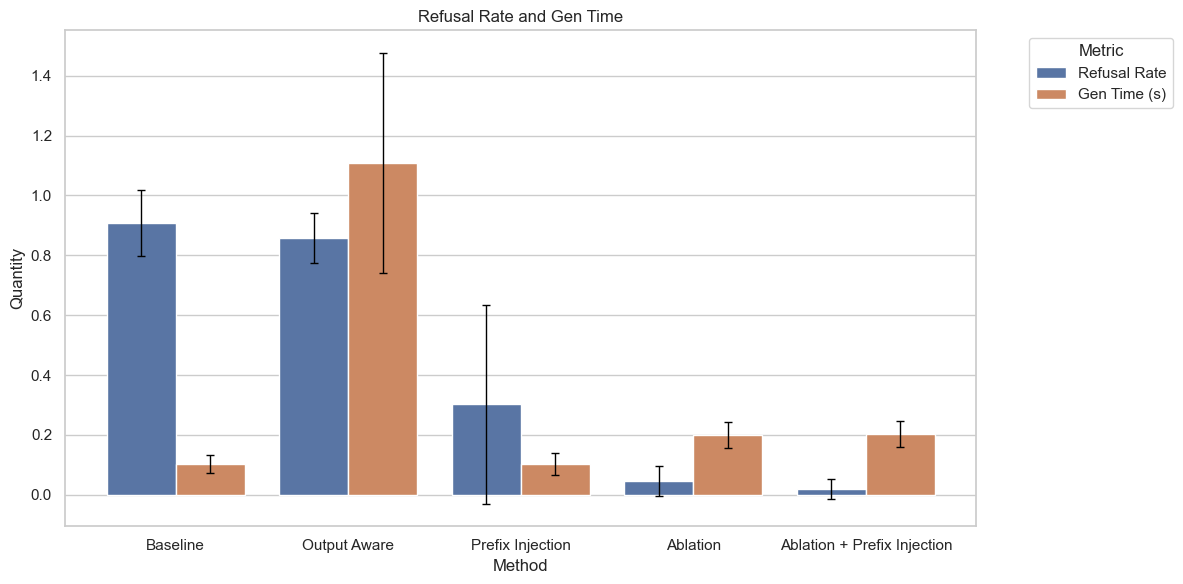

In [171]:
plot_two_metrics_side_by_side(
    df=avg_df,
    metric1="refusal",
    metric2="gen_time",
    title="Refusal Rate and Gen Time",
    method_display=method_map,
    metric_display={
        "refusal": "Refusal Rate",
        "gen_time": "Gen Time (s)"
    },
    method_order=method_order,
    y_label="Quantity"
)